In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Onkar\Downloads\TASK-ML-INTERN.csv")

# 1.  Data Exploration and Preprocessing

In [3]:
# Drop ID column and check for missing values
data = data.drop(columns=["hsi_id"], errors='ignore')
missing_values = data.isnull().sum().sum()

if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print(f"Missing values found: {missing_values}")

No missing values in the dataset.


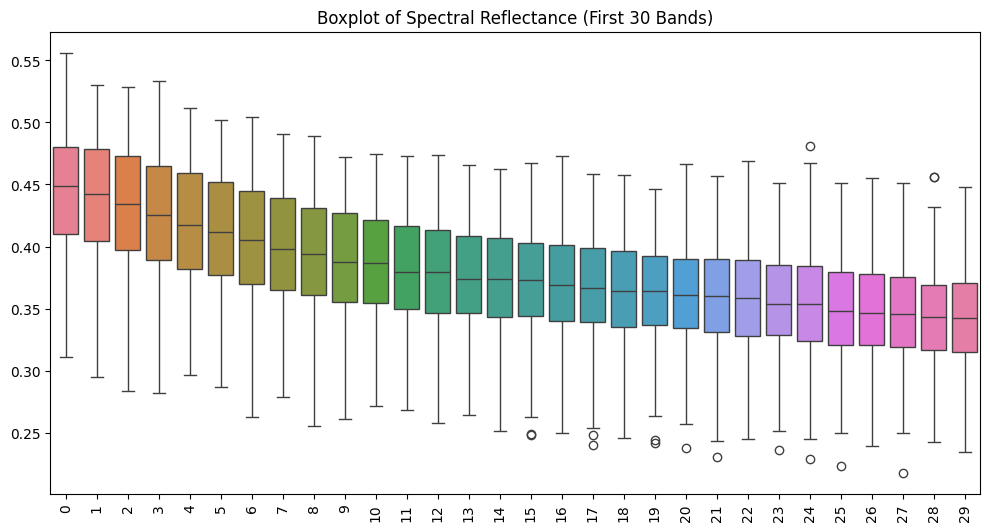

In [4]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :30])  # Visualize the first 30 bands for simplicity
plt.xticks(rotation=90)
plt.title("Boxplot of Spectral Reflectance (First 30 Bands)")
plt.show()

In [5]:
# Normalize features
X = data.drop(columns=["vomitoxin_ppb"])
y = data["vomitoxin_ppb"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

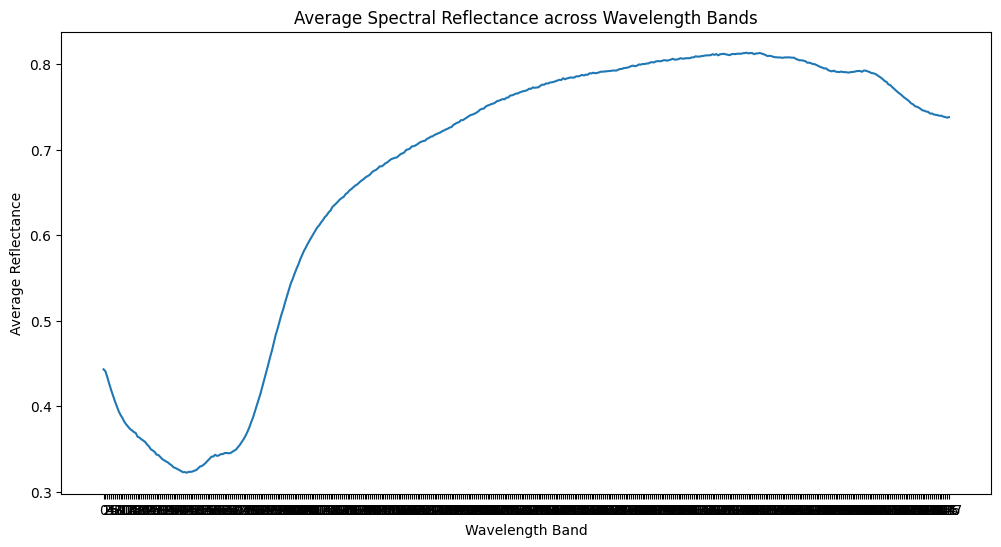

In [6]:
# Visualize average spectral reflectance
plt.figure(figsize=(12, 6))
plt.plot(X.columns, np.mean(X, axis=0))
plt.xlabel("Wavelength Band")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance across Wavelength Bands")
plt.show()

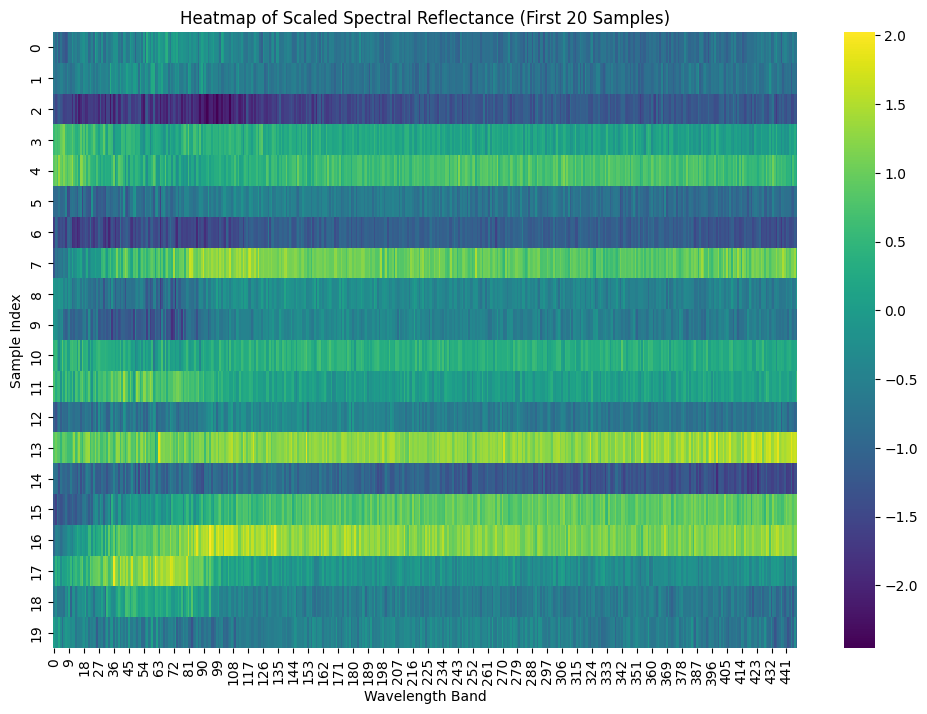

In [7]:
# Heatmap for sample comparisons
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled[:20], cmap='viridis', cbar=True)
plt.xlabel("Wavelength Band")
plt.ylabel("Sample Index")
plt.title("Heatmap of Scaled Spectral Reflectance (First 20 Samples)")
plt.show()

# 2. Dimensionality Reduction

In [8]:
# PCA for dimensionality reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Variance explained by top components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Top 10 Principal Components:", explained_variance)



Explained Variance by Top 10 Principal Components: [8.70779088e-01 5.84906915e-02 2.11229415e-02 1.13396419e-02
 2.23930528e-03 8.10725172e-04 4.84913298e-04 3.91163962e-04
 3.71896765e-04 3.63643511e-04]


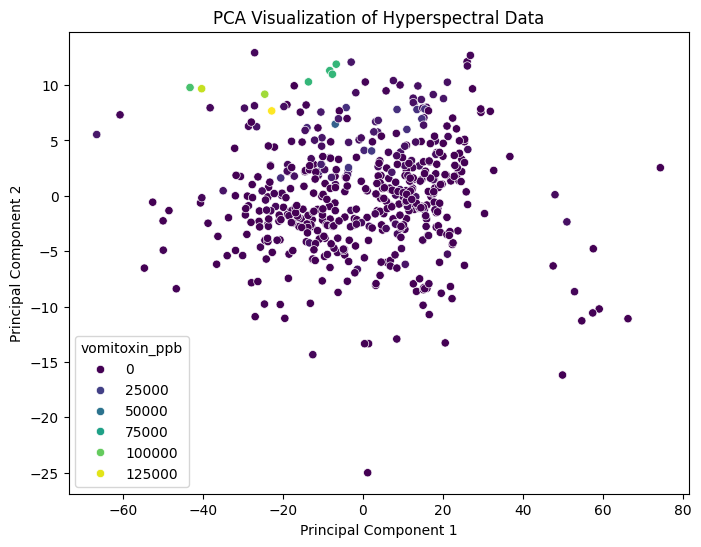

In [9]:
# PCA Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Hyperspectral Data")
plt.show()

# 3. Model Training


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Random Forest Regressor

In [11]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

C:\Users\Onkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [12]:
# Predictions for evaluation
y_pred_rf = regressor.predict(X_test)

### Neural Network

In [13]:
# Model training with a simple neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\Onkar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 207944112.0000 - val_loss: 203154384.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 178464224.0000 - val_loss: 203043968.0000
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108877880.0000 - val_loss: 202861360.0000
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111440240.0000 - val_loss: 202566912.0000
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 271406784.0000 - val_loss: 202108640.0000
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74166328.0000 - val_loss: 201607824.0000
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70544672.0000 - val_loss: 200978272.0000
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 214884256.0000 - val_loss: 200199808.0000
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75459272.0000 - val_loss: 199411328.0000
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139834416.0000 - val_loss: 198329488.0000
E

In [15]:
# Predictions for evaluation
y_pred_nn = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


# 4. Model Evaluation

### Random Forest

In [16]:
#Regression metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Evaluation:\nMAE: {mae_rf:.2f}\nRMSE: {rmse_rf:.2f}\nR² Score: {r2_rf:.2f}")

Random Forest Evaluation:
MAE: 4387.83
RMSE: 14252.19
R² Score: 0.27


Text(0.5, 1.0, 'Actual vs Predicted DON Concentration (Random Forest)')

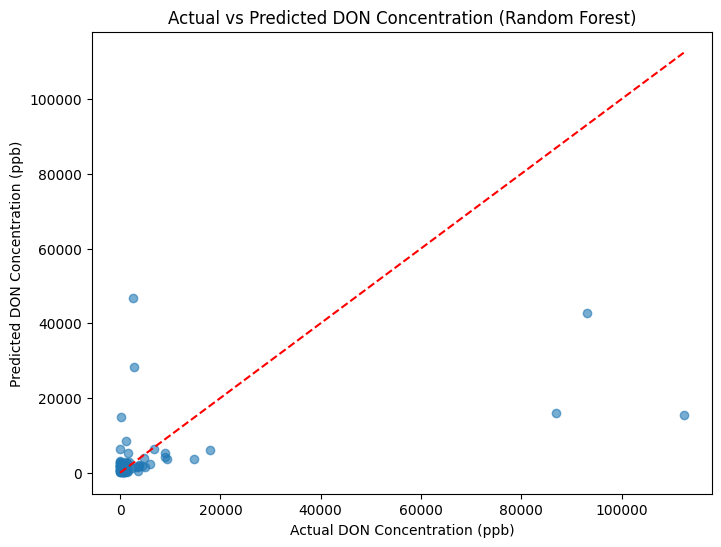

In [17]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual DON Concentration (ppb)")
plt.ylabel("Predicted DON Concentration (ppb)")
plt.title("Actual vs Predicted DON Concentration (Random Forest)")

### Neural Network

In [18]:
# Regression metrics
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Evaluation:\nMAE: {mae_nn:.2f}\nRMSE: {rmse_nn:.2f}\nR² Score: {r2_nn:.2f}")



Neural Network Evaluation:
MAE: 3881.56
RMSE: 11511.98
R² Score: 0.53


Text(0.5, 1.0, 'Actual vs Predicted DON Concentration (Neural Network)')

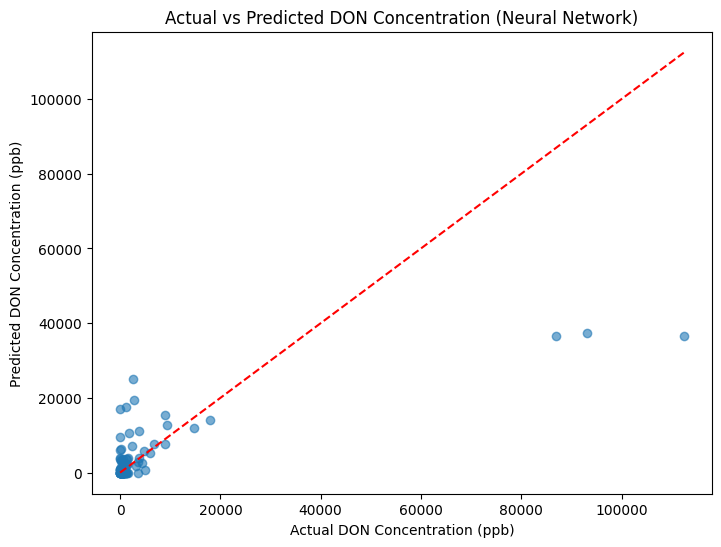

In [19]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual DON Concentration (ppb)")
plt.ylabel("Predicted DON Concentration (ppb)")
plt.title("Actual vs Predicted DON Concentration (Neural Network)")